# RESPONSI
Nama: Ahmad Wildan Jauharul Fuad
NIM: 22/504334/PA/21690

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
!pip install langdetect
!pip install Sastrawi
!pip install pyLDAvis
!git clone https://github.com/dotawan09/arkav.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=0143c2d5c14b6232cf935800f7ed49fb2454a2fe78e41523560cffed3bd8b435
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.3 MB/s eta 0:00:00
Cloning into 'arkav'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 1.15 MiB | 5.90 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import os
import requests

# data visualisation and manipulation
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#preprocessing
import re
import string
import nltk
import langdetect
import spacy
import ast
import collections
import itertools

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# for named entity recognition (NER)
from nltk import ne_chunk

from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords  #stopwords
from nltk.corpus import wordnet
from string import punctuation

from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

import gensim
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler

import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# kamus 1: sastrawi
factory = StopWordRemoverFactory()
sw_id1 = factory.get_stop_words()

# kamus 2
sw_id2 = pd.read_csv("https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt",header=None)
sw_id2 = list(sw_id1[0])

# kamus 3
sw_id3 = ['kalau', 'terus', 'ini']

# Tambahkan kamus lainnya
sw_id4 = stopwords.words("indonesian") + list(punctuation)


# Gabungkan
sw_id = sw_id1 + sw_id2 + sw_id3


sw_id[:10]

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua']

# Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EV labeled.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


username                                          tweet_url  Label  \
0          RIlahi2   https://x.com/RIlahi2/status/1753363971141468216     -1   
1     dian97605702  https://x.com/dian97605702/status/178658916159...      0   
2         kumparan  https://x.com/kumparan/status/1792359877412839526      0   
3        kompascom  https://x.com/kompascom/status/177641541559984...      0   
4     5teV3n_Pe9eL  https://x.com/5teV3n_Pe9eL/status/179597284180...      0   
..             ...                                                ...    ...   
495       XueYaman  https://x.com/XueYaman/status/1752185167282937875      0   
496       hari_bdl  https://x.com/hari_bdl/status/1789273719782932881      0   
497     kompasiana  https://x.com/kompasiana/status/17505184347551...     -1   
498  CMTGforwarder  https://x.com/CMTGforwarder/status/17877552621...      0   
499       detikcom  https://x.com/detikcom/status/1765598751253565828      0   

                                             full_text  
0    Misalnya...subsidi motor atau mobil listrik di...  
1    @AzzamIzzulhaq ku tahu itu indonesia pernah pu...  
2    Berita populer kumparanOTO Minggu (19/5) estim...  
3    Ketika kesehatan baterai mobil listrik turun d...  
4    @kumparan Yo jelas mikir2 lah konsumen namanya...  
..                                                 ...  
495  @detikcom @gibran_tweet ternyata memang benar ...  
496  @NOTASLIMBOY Banting harga apa berarti sebelum...  
497  Dampak Mobil Listrik terhadap Usaha Tradisiona...  
498  @AzzamIzzulhaq @ganarmdhn Mobil listrik anak b...  
499  Wuling Bingo terbaru meluncur di China dengan ...  

[500 rows x 4 columns]

In [ ]:
df['Label'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Label
 0     206
-1     118
 10    116
 1      60
Name: count, dtype: int64

Labeling dilakukan secara manual dengan menggunakan 4 label.
- 0 menunjukkan netral
- 1 menunjukkan positif
- (-1) menunjukkan negatif
- 10 menunjukkan tidak berkaitan dengan topik

# EDA

In [ ]:
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def plot_wordcloud_and_frequency(df, text_column, label_column, stopwords = sw_id, num_word = 10):
    labels = df[label_column].unique()
    num_cols = 2

    for label in labels:
        fig, axes = plt.subplots(1, num_cols, figsize=(12, 6))

        # Filter text by label
        text = " ".join(df[df[label_column] == label][text_column])

        # Generate wordcloud with a colormap
        wordcloud = WordCloud(width=400, height=400,
                              background_color='white',
                              stopwords=stopwords,
                              min_font_size=10,
                              colormap='viridis').generate(text)

        # Display wordcloud
        axes[0].imshow(wordcloud)
        axes[0].axis("off")
        axes[0].set_title(f'WordCloud - {label}')

        # Compute word frequency
        text_data = df[df[label_column] == label][text_column]
        word_frequency = text_data.str.split(expand=True).stack().value_counts()
        freq = word_frequency.head(num_word) # adjust numbers of word

        # Display word frequency bar plot with a color palette
        sns.barplot(x=freq.values, y=freq.index, ax=axes[1], palette="muted")
        axes[1].set_title(f'Word Frequency - {label}')
        axes[1].set_xlabel('Count')
        for p in axes[1].patches:
            axes[1].annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + .5), ha='left', va='center')

        plt.tight_layout()
        plt.show()

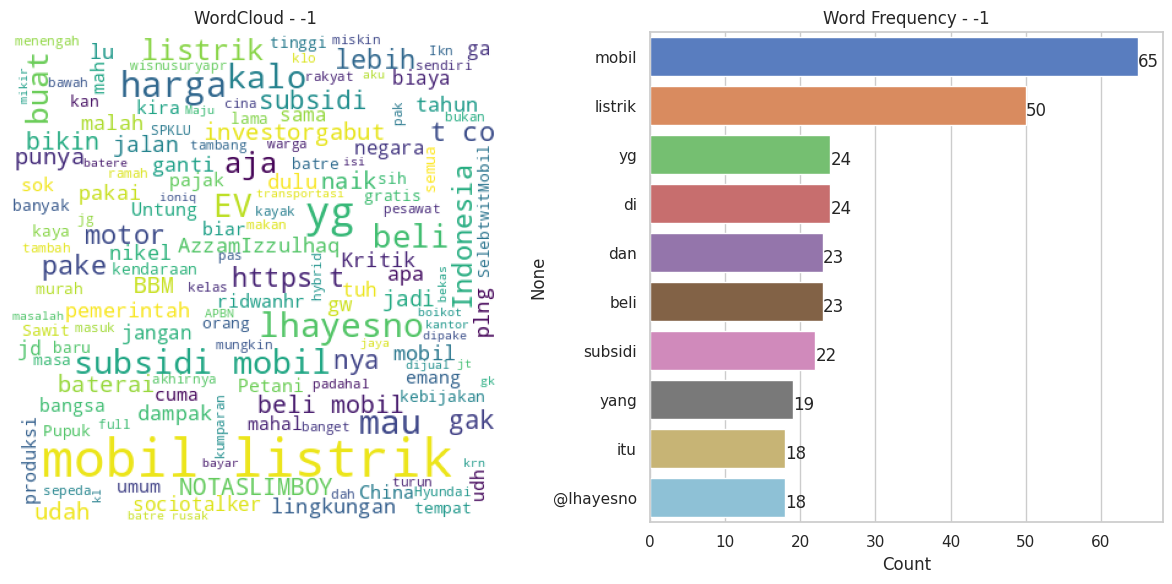

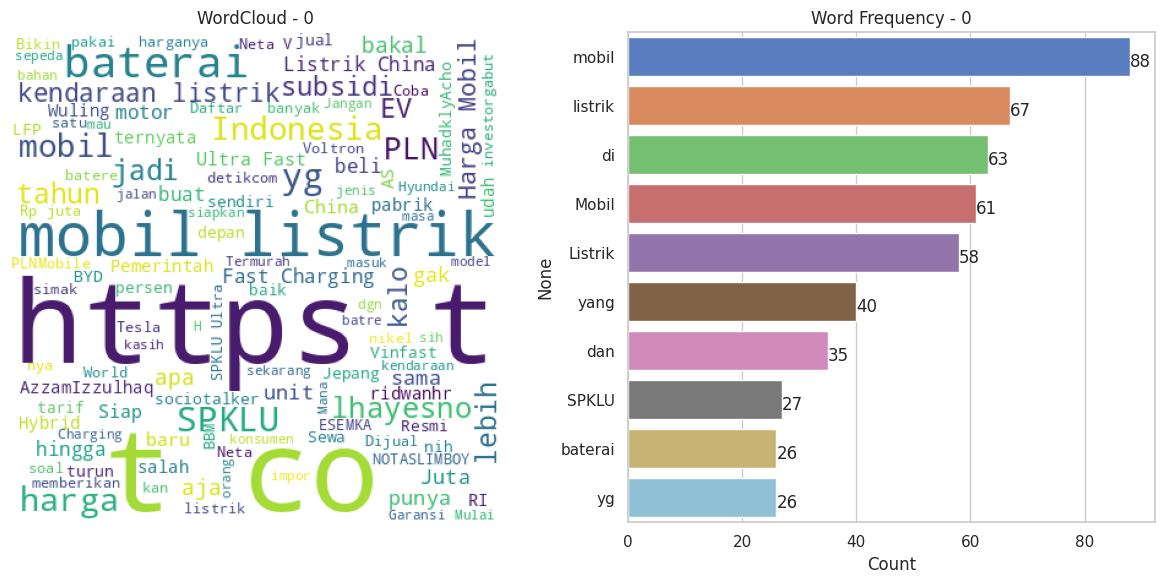

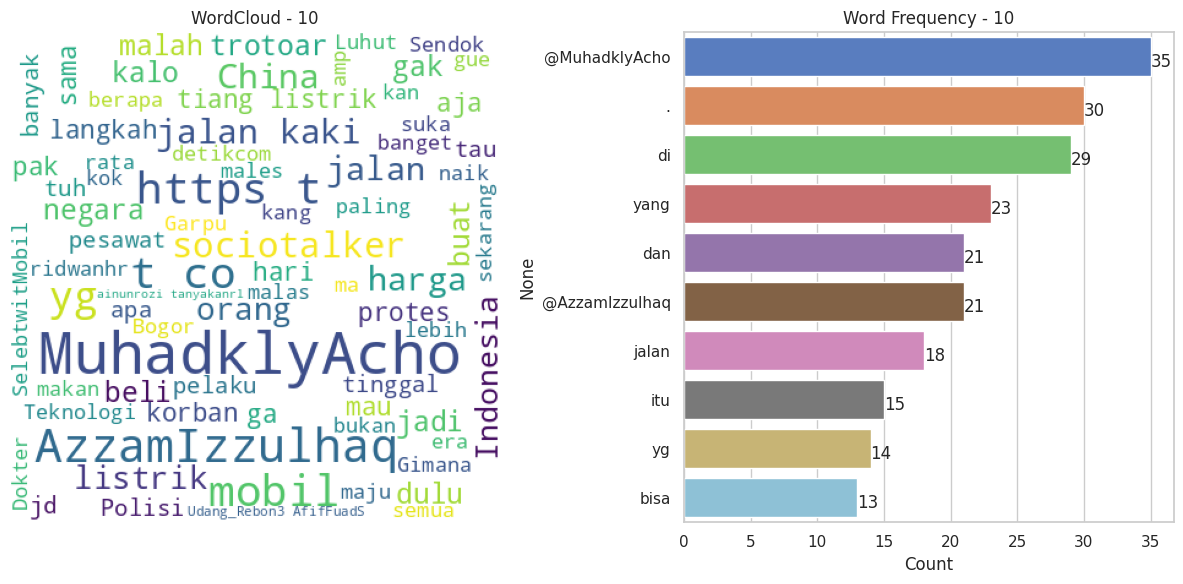

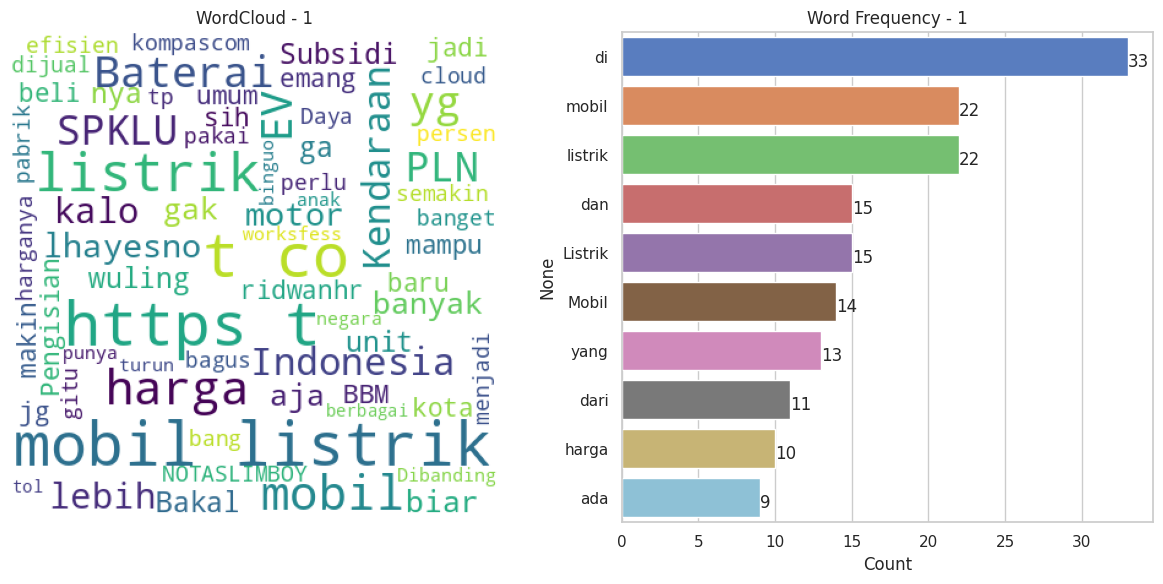

In [ ]:
plot_wordcloud_and_frequency(df, 'full_text', 'Label', sw_id, 10)

# Pilih Fitur

In [ ]:
features = ['Label', 'full_text']

In [ ]:
df = df[features]
df

Label  \
0       -1   
1        0   
2        0   
3        0   
4        0   
..     ...   
495      0   
496      0   
497     -1   
498      0   
499      0   

                                                                                                                                                                     full_text  
0                                                                  Misalnya...subsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik...  
1                        @AzzamIzzulhaq ku tahu itu indonesia pernah punya industri pesawat sendiri bahkan mobil juga pernah merintis..tapi cerita nya sekarang berbeda jauh..  
2            Berita populer kumparanOTO Minggu (19/5) estimasi harga mobil listrik Hyundai Kona dampak fitur fast charging mobil listrik. #kumparanOTO https://t.co/VhRBvZsX0G  
3                                                    Ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh Vinfast. https://t.co/lJ3fg5XScL  
4                                                @kumparan Yo jelas mikir2 lah konsumen namanya bekas batere rawan soak kalo batere ude soak harganya bisa setengah harga beli  
..                                                                                                                                                                         ...  
495                                                                                   @detikcom @gibran_tweet ternyata memang benar nikel itu bakal jadi bahan baterai kw2 ...  
496                                                                                                   @NOTASLIMBOY Banting harga apa berarti sebelumnya ambil untung kegedean?  
497                                                                    Dampak Mobil Listrik terhadap Usaha Tradisional: Potensi Penutupan dan Adaptasi https://t.co/bOZONFirfQ  
498                                                                               @AzzamIzzulhaq @ganarmdhn Mobil listrik anak bangsa dijegal karena gagal lolos uji emisi ???  
499  Wuling Bingo terbaru meluncur di China dengan nama Bingo Plus. Begini spesifikasi mobil listrik yang dijual mulai harga di bawah Rp 200 juta itu. https://t.co/r5jzzbXmQi  

[500 rows x 2 columns]

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

# Drop Missing Value
df = df.dropna()

In [ ]:
df = df.drop(df[df['Label'] == 10].index)

In [ ]:
df.shape

(384, 2)

# Pre Processing

## Removing

In [ ]:
def clean_text(text):
    # Menghapus username
    text = re.sub(r'@\w+', '', text)

    # Menghapus tag
    text = re.sub(r'#\w+', '', text)

    # Hapus teks dalam []
    text = re.sub(r'\[\w+]', '', text)

    # Penghapusan Karakter Non-Alfanumerik
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus URL
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\b\w+(?:com|org)\b', '', text)

    # Case Folding: Menyeragamkan teks (lower case)
    text = text.lower()

    # Menghapus whitespace (spasi ganda, tab, newline)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    #  Punctuation Removal: Menghapus tanda baca (seperti titik, koma, tanda seru, tanda tanya, dan titik koma)
    text = text.translate(str.maketrans('', '', string.punctuation))

    PUNCT_TO_REMOVE = '"#$%^*()_+-=<>;[]|{}~:â€™¦£?ðÿ¼'
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

    return text

In [ ]:
# Terapkan pada dataset
df['full_text'] = df['full_text'].apply(clean_text)

In [ ]:
df

Label  \
0       -1   
1        0   
2        0   
3        0   
4        0   
..     ...   
495      0   
496      0   
497     -1   
498      0   
499      0   

                                                                                                                                           full_text  
0                                              misalnyasubsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik  
1                 ku tahu itu indonesia pernah punya industri pesawat sendiri bahkan mobil juga pernah merintistapi cerita nya sekarang berbeda jauh  
2                           berita populer kumparanoto minggu 195 estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik  
3                                                   ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh vinfast  
4                                yo jelas mikir2 lah konsumen namanya bekas batere rawan soak kalo batere ude soak harganya bisa setengah harga beli  
..                                                                                                                                               ...  
495                                                                                     ternyata memang benar nikel itu bakal jadi bahan baterai kw2  
496                                                                                       banting harga apa berarti sebelumnya ambil untung kegedean  
497                                                                   dampak mobil listrik terhadap usaha tradisional potensi penutupan dan adaptasi  
498                                                                                   mobil listrik anak bangsa dijegal karena gagal lolos uji emisi  
499  wuling bingo terbaru meluncur di china dengan nama bingo plus begini spesifikasi mobil listrik yang dijual mulai harga di bawah rp 200 juta itu  

[384 rows x 2 columns]

## Slang Word

In [ ]:
# kamus 1
sl1 = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "uu" : "undang undang", "kementrian" : "kementerian", "trus" : "terus", "truss" : "terus", "trusss" : "terus", "ttapi": "tapi", "piluhan": "pilihan", "geratis" : "gratis", 'bany': 'banyak', 'bat' : 'banget', 'th':'tahun', 'indo':'indonesia', 'indon':'indonesia','indons':'indonesia', 'indone':'indonesia', 'indones':'indonesia', 'jngka': 'jangka', 'tqpi' : 'tapi', 'haha':'tertawa', 'hahaha':'tertawa' }

# kamus2
sl2 = pd.read_csv("https://raw.githubusercontent.com/haryoa/indo-collex/main/dict/inforformal-formal-Indonesian-dictionary.tsv", sep="\t")
sl2.set_index("informal", drop=True, inplace=True)
sl2 = sl2.to_dict()["formal"]
sl2

# kamus 3
sl3 = pd.read_csv("https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/kbba.txt", sep="\t", header=None)
sl3.set_index(0, drop=True, inplace=True)
sl3 = sl3.to_dict()[1]

# Gabungkan semua kamus slang words
sl_word = {**sl1, **sl2, **sl3}

# Kamus 4
file = open("arkav/combined_slang_words.txt")
content = file.read()
dicti = ast.literal_eval(content)
slang = pd.DataFrame(dicti.items(),columns=['original','replacement'])
slang_dict_map = dict(zip(slang['original'], slang['replacement']))


print(dict(list(sl_word.items())[1:10]))

{'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku'}


In [ ]:
def slang_preprocess(text, slang_words = sl_word, slang_dict_map = slang_dict_map):
    # SlangWords Handling
    text = ' '.join([slang_words.get(word, word) for word in text.split()])
    text = ' '.join([slang_dict_map[word] if word in slang_dict_map else word for word in text.split(' ')])

    return text

In [ ]:
# Terapkan pada dataset
df['full_text'] = df['full_text'].apply(slang_preprocess)

In [ ]:
df

Label  \
0       -1   
1        0   
2        0   
3        0   
4        0   
..     ...   
495      0   
496      0   
497     -1   
498      0   
499      0   

                                                                                                                                               full_text  
0                                                  misalnyasubsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik  
1                     ku tahu itu indonesia pernah punya industri pesawat sendiri bahkan mobil juga pernah merintistapi cerita nya sekarang berbeda jauh  
2                               berita populer kumparanoto minggu 195 estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik  
3                                                       ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh vinfast  
4                                  iya jelas mikir2 lah konsumen namanya bekas batere rawan soak kalau batere ude soak harganya bisa setengah harga beli  
..                                                                                                                                                   ...  
495                                                                                         ternyata memang benar nikel itu bakal jadi bahan baterai kw2  
496                                                                                           banting harga apa berarti sebelumnya ambil untung kegedean  
497                                                                       dampak mobil listrik terhadap usaha tradisional potensi penutupan dan adaptasi  
498                                                                                       mobil listrik anak bangsa dijegal karena gagal lolos uji emisi  
499  wuling bingo terbaru meluncur di china dengan nama bingo plus begini spesifikasi mobil listrik yang dijual mulai harga di bawah rupiah 200 juta itu  

[384 rows x 2 columns]

In [ ]:
corpus = df['full_text'].to_list()
corpus

['misalnyasubsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik',
 'ku tahu itu indonesia pernah punya industri pesawat sendiri bahkan mobil juga pernah merintistapi cerita nya sekarang berbeda jauh',
 'berita populer kumparanoto minggu 195 estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik',
 'ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh vinfast',
 'iya jelas mikir2 lah konsumen namanya bekas batere rawan soak kalau batere ude soak harganya bisa setengah harga beli',
 'pemerintah ri klaim baterai nikel lebih canggih buat mobil listrik',
 'iya bisa dong pcr saja bisa lebih mahal pada saat itu',
 'garansi batere 8 tahun',
 'emoh buy car di indotetannga saya beli speed boat parkir di halaman eh maksudnya bukan di indonesia sudah lah merantaubanyakin tidak burner ini di country hahaha',
 'kalau ilustrasi pemakaiannya 6 tahun kabar bagus buat kita semua orang kaya danatau kau

## Stop Word (Bikin Kolom Baru)

In [ ]:
# kamus 1: sastrawi
factory = StopWordRemoverFactory()
sw_id1 = factory.get_stop_words()

# kamus 2
sw_id2 = pd.read_csv("https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt",header=None)
sw_id2 = list(sw_id1[0])

# kamus 3
sw_id3 = ['kalau', 'terus', 'ini']

# Tambahkan kamus lainnya
sw_id4 = stopwords.words("indonesian") + list(punctuation)


# Gabungkan
sw_id = sw_id1 + sw_id2 + sw_id3


sw_id[:10]

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua']

In [ ]:
def stopwords_removal(words,stopword = sw_id):
    return [word for word in words if word not in stopword]
def stop_word_preprocessing(text, sw = sw_id):
   # Stop Words Removal
    text = text.split()
    text = " ".join(stopwords_removal(text, sw))

    return text

In [ ]:
df['stop_word'] = df['full_text'].apply(stop_word_preprocessing)

In [ ]:
df[df['Label'] == -1].head()

Label  \
0      -1   
17     -1   
27     -1   
29     -1   
40     -1   

                                                                                                                                                                                                              full_text  \
0                                                                                                                 misalnyasubsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik   
17                                                                              ingin beli motor listrik tetapi sadar tidak ada splku jalannya pun naik turun baiklah tidak apaapa pakai sepeda saja sambil beli jetski   
27  asalkan jangan indonesia dijadikan tempat uji coba pesawat china kayak sekarang mobil cina dibangga2in di indonesia seperti wuling byd dan lain-lain padahal warga china lebih senang pakai merk jerman dan amerika   
29                                                                                                                                                         jangan sok kaget lahmasa tidak kenal perilaku bangsa sendiri   
40                                                                                        kalau di indonesia tetap harus punya mobil bbm atau alternatif hybrid susah ngandelin mobil ev saja terutama untuk jalan jauh   

                                                                                                                                                                                           stop_word  
0                                                                                                            misalnyasubsidi motor mobil listrik dialihkan buat beli kira kira sungai2 tambah ciamik  
17                                                                                                        beli motor listrik sadar splku jalannya naik turun baiklah apaapa pakai sepeda beli jetski  
27  asalkan jangan indonesia dijadikan tempat uji coba pesawat china kayak sekarang mobil cina dibangga2in indonesia wuling byd lain-lain padahal warga china lebih senang pakai merk jerman amerika  
29                                                                                                                                            jangan sok kaget lahmasa kenal perilaku bangsa sendiri  
40                                                                                                    indonesia tetap punya mobil bbm alternatif hybrid susah ngandelin mobil ev terutama jalan jauh

## Stemming (Bikin Kolom Baru)

In [ ]:
# Initialize the Porter Stemmer
#stemmer = PorterStemmer()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    #return [stemmer.stem(word) for word in words]
    return stemmer.stem(words)


In [ ]:
# Apply the function to the 'text' column and create a new column 'stemmed_text'
df['stemmed_messages'] = df['stop_word'].apply(stem_words)

In [ ]:
df

Label  \
0       -1   
1        0   
2        0   
3        0   
4        0   
..     ...   
495      0   
496      0   
497     -1   
498      0   
499      0   

                                                                                                                                               full_text  \
0                                                  misalnyasubsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik   
1                     ku tahu itu indonesia pernah punya industri pesawat sendiri bahkan mobil juga pernah merintistapi cerita nya sekarang berbeda jauh   
2                               berita populer kumparanoto minggu 195 estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik   
3                                                       ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh vinfast   
4                                  iya jelas mikir2 lah konsumen namanya bekas batere rawan soak kalau batere ude soak harganya bisa setengah harga beli   
..                                                                                                                                                   ...   
495                                                                                         ternyata memang benar nikel itu bakal jadi bahan baterai kw2   
496                                                                                           banting harga apa berarti sebelumnya ambil untung kegedean   
497                                                                       dampak mobil listrik terhadap usaha tradisional potensi penutupan dan adaptasi   
498                                                                                       mobil listrik anak bangsa dijegal karena gagal lolos uji emisi   
499  wuling bingo terbaru meluncur di china dengan nama bingo plus begini spesifikasi mobil listrik yang dijual mulai harga di bawah rupiah 200 juta itu   

                                                                                                                         stop_word  \
0                                          misalnyasubsidi motor mobil listrik dialihkan buat beli kira kira sungai2 tambah ciamik   
1        ku tahu indonesia pernah punya industri pesawat sendiri bahkan mobil pernah merintistapi cerita nya sekarang berbeda jauh   
2         berita populer kumparanoto minggu 195 estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik   
3                                                     kesehatan baterai mobil listrik turun bawah 70 persen diganti gratis vinfast   
4                       iya jelas mikir2 lah konsumen namanya bekas batere rawan soak batere ude soak harganya setengah harga beli   
..                                                                                                                             ...   
495                                                                       ternyata memang benar nikel bakal jadi bahan baterai kw2   
496                                                                     banting harga apa berarti sebelumnya ambil untung kegedean   
497                                                              dampak mobil listrik usaha tradisional potensi penutupan adaptasi   
498                                                                        mobil listrik anak bangsa dijegal gagal lolos uji emisi   
499  wuling bingo terbaru meluncur china nama bingo plus begini spesifikasi mobil listrik dijual mulai harga bawah rupiah 200 juta   

                                                                                                             stemmed_messages  
0                                          misalnyasubsidi motor mobil listrik alih buat beli kira kira sungai2 tambah ciamik  
1      ku tahu indonesia pernah punya industri pesawat sendiri bahkan mobil pernah merintistapi ce

## Create Fitur Length

In [ ]:
def text_len(text):
  return len(text.split(" "))

In [ ]:
df['length_text'] = df['full_text'].apply(text_len)

In [ ]:
df

Label  \
0       -1   
1        0   
2        0   
3        0   
4        0   
..     ...   
495      0   
496      0   
497     -1   
498      0   
499      0   

                                                                                                                                               full_text  \
0                                                  misalnyasubsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik   
1                     ku tahu itu indonesia pernah punya industri pesawat sendiri bahkan mobil juga pernah merintistapi cerita nya sekarang berbeda jauh   
2                               berita populer kumparanoto minggu 195 estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik   
3                                                       ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh vinfast   
4                                  iya jelas mikir2 lah konsumen namanya bekas batere rawan soak kalau batere ude soak harganya bisa setengah harga beli   
..                                                                                                                                                   ...   
495                                                                                         ternyata memang benar nikel itu bakal jadi bahan baterai kw2   
496                                                                                           banting harga apa berarti sebelumnya ambil untung kegedean   
497                                                                       dampak mobil listrik terhadap usaha tradisional potensi penutupan dan adaptasi   
498                                                                                       mobil listrik anak bangsa dijegal karena gagal lolos uji emisi   
499  wuling bingo terbaru meluncur di china dengan nama bingo plus begini spesifikasi mobil listrik yang dijual mulai harga di bawah rupiah 200 juta itu   

                                                                                                                         stop_word  \
0                                          misalnyasubsidi motor mobil listrik dialihkan buat beli kira kira sungai2 tambah ciamik   
1        ku tahu indonesia pernah punya industri pesawat sendiri bahkan mobil pernah merintistapi cerita nya sekarang berbeda jauh   
2         berita populer kumparanoto minggu 195 estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik   
3                                                     kesehatan baterai mobil listrik turun bawah 70 persen diganti gratis vinfast   
4                       iya jelas mikir2 lah konsumen namanya bekas batere rawan soak batere ude soak harganya setengah harga beli   
..                                                                                                                             ...   
495                                                                       ternyata memang benar nikel bakal jadi bahan baterai kw2   
496                                                                     banting harga apa berarti sebelumnya ambil untung kegedean   
497                                                              dampak mobil listrik usaha tradisional potensi penutupan adaptasi   
498                                                                        mobil listrik anak bangsa dijegal gagal lolos uji emisi   
499  wuling bingo terbaru meluncur china nama bingo plus begini spesifikasi mobil listrik dijual mulai harga bawah rupiah 200 juta   

                                                                                                             stemmed_messages  \
0                                          misalnyasubsidi motor mobil listrik alih buat beli kira kira sungai2 tambah ciamik   
1      ku tahu indonesia pernah punya industri pesawat sendiri bahkan mobil pernah merintistapi 

## Save Data

In [ ]:
def upload_csv_to_gdrive(df, name_file):
  csv_filename = f'/content/drive/MyDrive/{name_file}.csv'  # Adjust the path as needed
  df.to_csv(csv_filename, index=False)

  print("CSV file saved to Google Drive:", csv_filename)

In [ ]:
upload_csv_to_gdrive(df, 'EV labeled pre processed 2')

CSV file saved to Google Drive: /content/drive/MyDrive/EV labeled pre processed 2.csv


# After Prepros

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EV labeled pre processed 2.csv')
df

Label  \
0       -1   
1        0   
2        0   
3        0   
4        0   
..     ...   
379      0   
380      0   
381     -1   
382      0   
383      0   

                                                                                                                                               full_text  \
0                                                  misalnyasubsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik   
1                     ku tahu itu indonesia pernah punya industri pesawat sendiri bahkan mobil juga pernah merintistapi cerita nya sekarang berbeda jauh   
2                               berita populer kumparanoto minggu 195 estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik   
3                                                       ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh vinfast   
4                                  iya jelas mikir2 lah konsumen namanya bekas batere rawan soak kalau batere ude soak harganya bisa setengah harga beli   
..                                                                                                                                                   ...   
379                                                                                         ternyata memang benar nikel itu bakal jadi bahan baterai kw2   
380                                                                                           banting harga apa berarti sebelumnya ambil untung kegedean   
381                                                                       dampak mobil listrik terhadap usaha tradisional potensi penutupan dan adaptasi   
382                                                                                       mobil listrik anak bangsa dijegal karena gagal lolos uji emisi   
383  wuling bingo terbaru meluncur di china dengan nama bingo plus begini spesifikasi mobil listrik yang dijual mulai harga di bawah rupiah 200 juta itu   

                                                                                                                         stop_word  \
0                                          misalnyasubsidi motor mobil listrik dialihkan buat beli kira kira sungai2 tambah ciamik   
1        ku tahu indonesia pernah punya industri pesawat sendiri bahkan mobil pernah merintistapi cerita nya sekarang berbeda jauh   
2         berita populer kumparanoto minggu 195 estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik   
3                                                     kesehatan baterai mobil listrik turun bawah 70 persen diganti gratis vinfast   
4                       iya jelas mikir2 lah konsumen namanya bekas batere rawan soak batere ude soak harganya setengah harga beli   
..                                                                                                                             ...   
379                                                                       ternyata memang benar nikel bakal jadi bahan baterai kw2   
380                                                                     banting harga apa berarti sebelumnya ambil untung kegedean   
381                                                              dampak mobil listrik usaha tradisional potensi penutupan adaptasi   
382                                                                        mobil listrik anak bangsa dijegal gagal lolos uji emisi   
383  wuling bingo terbaru meluncur china nama bingo plus begini spesifikasi mobil listrik dijual mulai harga bawah rupiah 200 juta   

                                                                                                             stemmed_messages  \
0                                          misalnyasubsidi motor mobil listrik alih buat beli kira kira sungai2 tambah ciamik   
1      ku tahu indonesia pernah punya industri pesawat sendiri bahkan mobil pernah merintistapi 

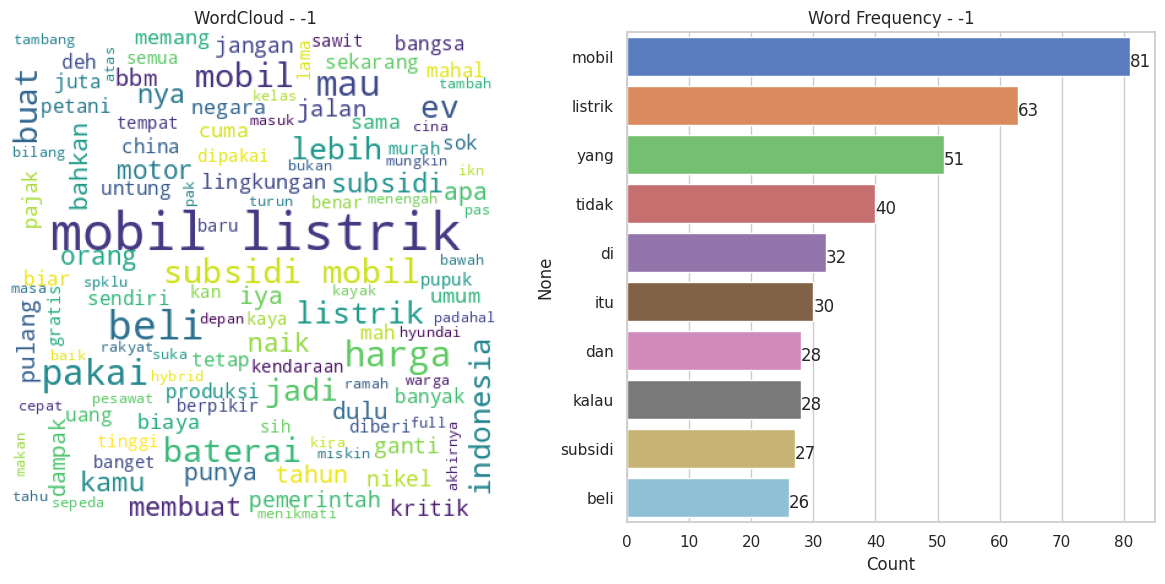

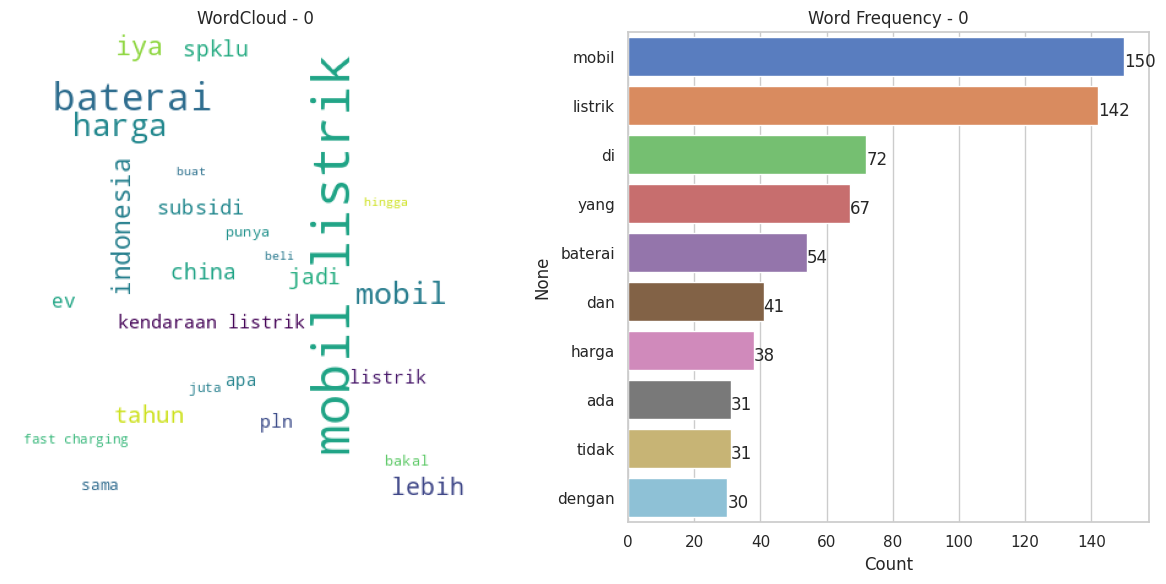

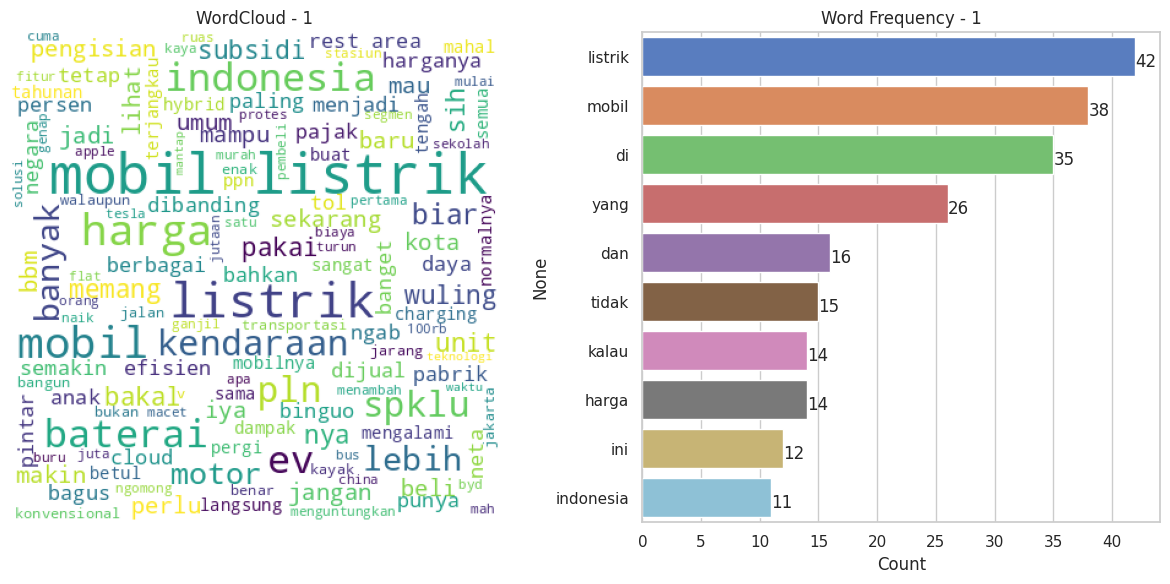

In [ ]:
plot_wordcloud_and_frequency(df, 'full_text', 'Label', sw_id, 10)

In [ ]:
#df['Label'][df['Label'] == 1] = 2
#df['Label'][df['Label'] == -1] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-84-5528e21014ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][df['Label'] == 1] = 2
<ipython-input-84-5528e21014ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][df['Label'] == -1] = 1


# Modeling using TF IDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df['full_text']
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify = y, random_state=42)

In [ ]:
# Feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(345, 1960)
(39, 1960)


In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00


In [ ]:
# Import library atas algoritma / metode klasifikasi yang digunakan

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [ ]:
# Membuat fungsi untuk mengevaluasi semua model secara otomatis

def all_model(list_model, X_train, X_test, y_train, y_test, random_state =42):
    # List kosong untuk menyimpan semua hasil pengukuran
    result = []
    for model in list_model:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
        accuracy = accuracy_score(y_test, y_pred)
        #multilog = multiclass_logloss(y_test, y_pred)
        #precision = precision_score(y_test, y_pred)
        #recall = recall_score(y_test, y_pred)
        #f1 = f1_score(y_test, y_pred)

        # Kumpulkan nilai-nilai di atas menjadi satu
        hasil = {
            'Model' : type(model).__name__,
            'Accuracy' : accuracy,
            #'MultiLog' : multilog
            #'F1 Score' : f1,
            #'Precision' : precision,
            #'Recall' : recall
        }

        print('Done')

        # Simpan nilai model ini dalam list result
        result.append(hasil)

    # Ubah menjadi dataframe
    result_all = pd.DataFrame(result)

    return result_all


In [ ]:
# Tuliskan semua model yang ingin digunakan beserta parameter di dalamnya

list_of_model = [
    LogisticRegression(max_iter = 1000),
    LogisticRegressionCV(max_iter = 1000),
    GradientBoostingClassifier(random_state = 42),
    HistGradientBoostingClassifier(random_state = 42),
    CatBoostClassifier(random_state = 42, logging_level = 'Silent'),
    #XGBClassifier(random_state = 42),
    #BernoulliNB(),
    GaussianNB(),
    MultinomialNB(),
    KNeighborsClassifier(),
    SVC(kernel='linear')
]

In [ ]:
# Jalankan fungsi yang telah dibuat

all_listed_model = all_model(list_of_model, X_train, X_test, y_train, y_test, random_state =42)
all_listed_model.sort_values('Accuracy', ascending = False)

Done
Done
Done
Done
Done
Done
Done
Done
Done


Model  Accuracy
3  HistGradientBoostingClassifier  0.641026
1            LogisticRegressionCV  0.615385
5                      GaussianNB  0.615385
7            KNeighborsClassifier  0.615385
8                             SVC  0.564103
0              LogisticRegression  0.538462
4              CatBoostClassifier  0.538462
6                   MultinomialNB  0.538462
2      GradientBoostingClassifier  0.512821

## Hyperparams the best Model

In [ ]:
#clf =  GaussianNB()
clf =  HistGradientBoostingClassifier(random_state = 42) # HistGradientBoostingClassifier classifier
#clf = LogisticRegression(max_iter = 1000) # LogisticRegression classifier

In [ ]:
#Fitting ke Model
clf.fit(X_train,y_train)

HistGradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred))

--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

          -1       0.67      0.33      0.44        12
           0       0.68      0.90      0.78        21
           1       0.40      0.33      0.36         6

    accuracy                           0.64        39
   macro avg       0.58      0.52      0.53        39
weighted avg       0.63      0.64      0.61        39



In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
#cv_method = RepeatedStratifiedKFold(n_splits=3,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_iter': [100, 200],
    'max_depth': [3, 5],
}
clf_hyper = GridSearchCV(estimator=clf,
                 param_grid=param_grid,
                 #cv=cv_method,   # use any cross validation technique
                 verbose=1,
                 scoring='accuracy')

#Fitting ke Model
clf_hyper.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
clf_hyper.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

          -1       0.58      0.58      0.58        12
           0       0.65      0.62      0.63        21
           1       0.29      0.33      0.31         6

    accuracy                           0.56        39
   macro avg       0.51      0.51      0.51        39
weighted avg       0.57      0.56      0.57        39



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Modeling using Count Word

In [ ]:
import re

def remove_numeric(text):
    # Use regular expression to remove numeric characters
    return re.sub(r'\d+', '', text)

In [ ]:
X = df['full_text'].apply(remove_numeric)
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify = y, random_state=42)

In [ ]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = sw_id)

# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(list(X_train))
xtrain_ctv =  ctv.transform(X_train)
xtest_ctv = ctv.transform(X_test)

In [ ]:
# Jalankan fungsi yang telah dibuat

all_listed_model = all_model(list_of_model, xtrain_ctv.toarray(), xtest_ctv.toarray(), y_train, y_test, random_state =42)
all_listed_model.sort_values('Accuracy', ascending = False)

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Model  Accuracy
5                     BernoulliNB  0.538462
6                      GaussianNB  0.487179
0              LogisticRegression  0.461538
1            LogisticRegressionCV  0.461538
4              CatBoostClassifier  0.461538
9                             SVC  0.461538
2      GradientBoostingClassifier  0.435897
7                   MultinomialNB  0.410256
8            KNeighborsClassifier  0.358974
3  HistGradientBoostingClassifier  0.333333

In [ ]:
clf = BernoulliNB()
clf.fit(xtrain_ctv.toarray(),y_train)
y_pred_nb = clf.predict(xtest_ctv.toarray())
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        12
           0       0.54      1.00      0.70        21
           1       0.00      0.00      0.00         6

    accuracy                           0.54        39
   macro avg       0.18      0.33      0.23        39
weighted avg       0.29      0.54      0.38        39



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Test Handling

## Import Data

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Test (2).csv')
df_test

username                                                 tweet_url  \
0       AutonetMagz      https://x.com/AutonetMagz/status/1787783684604784890   
1         kompascom        https://x.com/kompascom/status/1784529763597795610   
2       heralddotID      https://x.com/heralddotID/status/1790729352478621799   
3          VIVAcoid         https://x.com/VIVAcoid/status/1785856560327012395   
4       im_lawracle      https://x.com/im_lawracle/status/1750411509463982498   
5          trio0303         https://x.com/trio0303/status/1789906340711645308   
6         darmaja09        https://x.com/darmaja09/status/1782361643168706962   
7          detikcom         https://x.com/detikcom/status/1795001134811148454   
8           faz_hrp          https://x.com/faz_hrp/status/1788407158587236800   
9          detikcom         https://x.com/detikcom/status/1773712968485625884   
10  rohitsebastiian  https://x.com/rohitsebastiian/status/1789129238500769932   
11      idntalk_com      https://x.com/idntalk_com/status/1786057128777773267   
12      skyundocean      https://x.com/skyundocean/status/1788426157714706623   
13        kompascom        https://x.com/kompascom/status/1794254340607381769   
14      Golkar_News      https://x.com/Golkar_News/status/1774295159041389044   
15          megonoo          https://x.com/megonoo/status/1789938969876054471   
16         pakar_ai         https://x.com/pakar_ai/status/1775831508395372912   
17      Spongetrons      https://x.com/Spongetrons/status/1752594044142973042   
18       Agungbusby       https://x.com/Agungbusby/status/1790295138461536299   
19          bb_cyma          https://x.com/bb_cyma/status/1787001681076715560   
20   DaniCicadasBdg   https://x.com/DaniCicadasBdg/status/1786470086892732840   
21    VitalongC1234    https://x.com/VitalongC1234/status/1788413438924136597   
22       antaranews       https://x.com/antaranews/status/1758487931982074177   
23          tya1811          https://x.com/tya1811/status/1763116059727647204   
24         IrwindaF         https://x.com/IrwindaF/status/1788427511149580645   
25     CNNIndonesia     https://x.com/CNNIndonesia/status/1754750877032689954   
26      katadataoto      https://x.com/katadataoto/status/1774381900716793896   
27  FaisalA64763335  https://x.com/FaisalA64763335/status/1748484879980151128   
28          TopanTj          https://x.com/TopanTj/status/1790236890228195631   
29       tanyakanrl       https://x.com/tanyakanrl/status/1774048999600996822   
30        diyasprdn        https://x.com/diyasprdn/status/1785286292127006880   
31  NurrohmahL47510  https://x.com/NurrohmahL47510/status/1789154365653368969   
32        SINDOnews        https://x.com/SINDOnews/status/1794133302963732660   
33           suvcly           https://x.com/suvcly/status/1789026216999285234   
34      katadataoto      https://x.com/katadataoto/status/1785625789486272981   
35   WulingMotorsID   https://x.com/WulingMotorsID/status/1787029465362571497   
36         detikcom         https://x.com/detikcom/status/1747243806125076859   
37           Rizxfa           https://x.com/Rizxfa/status/1787238775523082663   
38    cnbcindonesia    https://x.com/cnbcindonesia/status/1779399476287045901   
39        SINDOnews        https://x.com/SINDOnews/status/1794979994877448604   
40        RidNgemil        https://x.com/RidNgemil/status/1785332187346456687   
41        kompascom        https://x.com/kompascom/status/1795964484655395264   
42      okezonenews      https://x.com/okezonenews/status/1784827593545728000   
43         kumparan         https://x.com/kumparan/status/1790548799372583425   
44         kumparan         https://x.com/kumparan/status/1792737478430085349   
45         detikoto         https://x.com/detikoto/status/1795345220483293252   
46         detikcom         https://x.com/detikcom/status/1772901873722531990   
47      ikhwanuddin      https://x.com/ikhwanuddin/status/1774087942258262179   
48         detikcom         https://x.com/

In [ ]:
df_test['label'].value_counts()

label
netral     19
positif    16
negatif    15
Name: count, dtype: int64

In [ ]:
# Maping df_test label to -1, 0, 1
df_test['label_encode'] = 0
df_test['label_encode'][df_test['label'] == 'negatif'] = -1
df_test['label_encode'][df_test['label'] == 'netral'] = 0
df_test['label_encode'][df_test['label'] == 'positif'] = 1

In [ ]:
df_test['label_encode'].value_counts()

label_encode
 0    19
 1    16
-1    15
Name: count, dtype: int64

In [ ]:
df_test.columns

Index(['username', 'tweet_url', 'full_text', 'label', 'label_encode',
       'stop_word', 'stemmed_messages', 'length_text'],
      dtype='object')

In [ ]:
features_test = ['full_text', 'label_encode']

In [ ]:
df_test = df_test[features_test]

## EDA

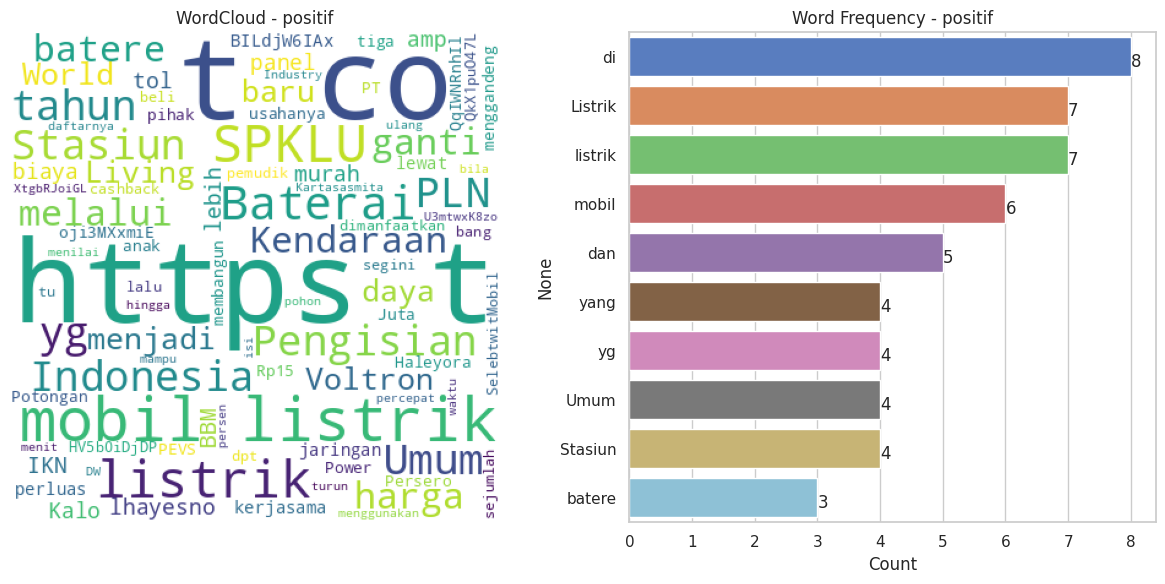

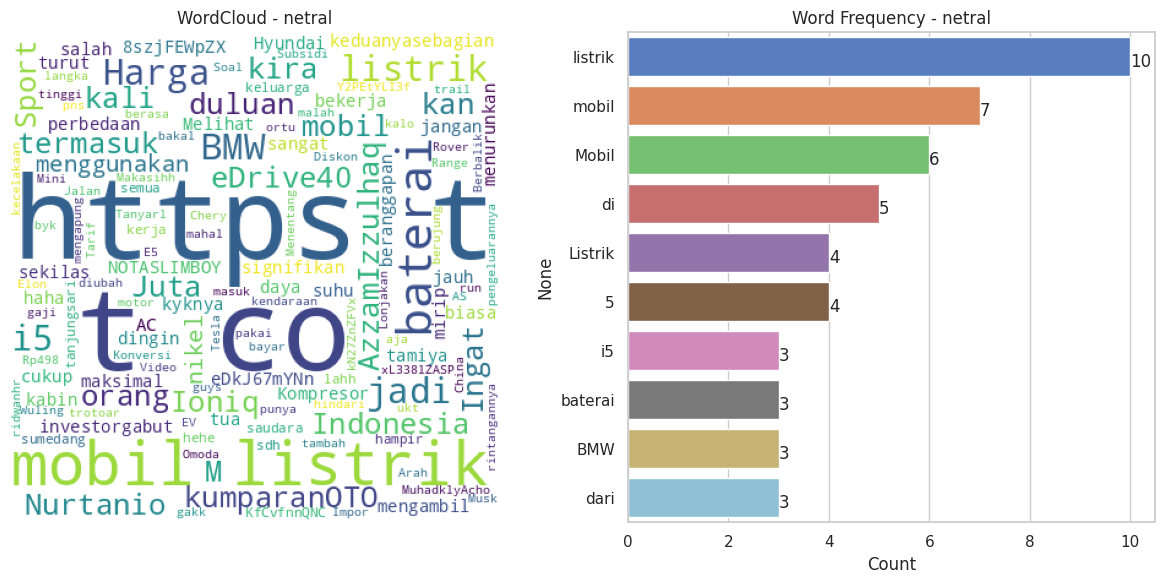

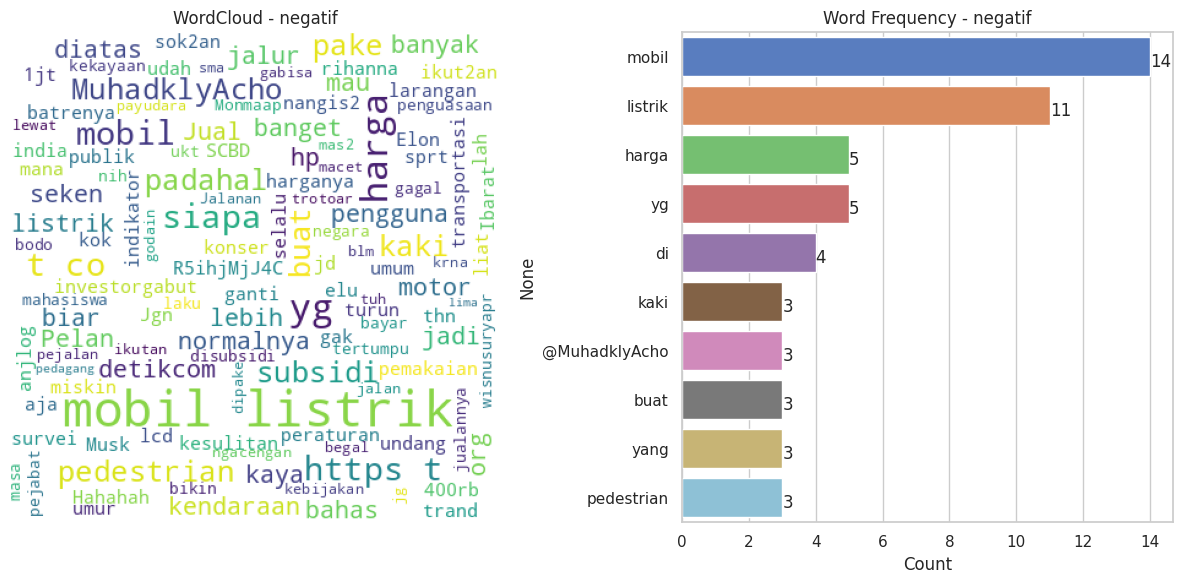

In [ ]:
plot_wordcloud_and_frequency(df_test, 'full_text', 'label', sw_id, 10)

## Pre-Processing

In [ ]:
# Terapkan pada dataset
df_test['full_text'] = df_test['full_text'].apply(clean_text)

In [ ]:
# Terapkan pada dataset
df_test['full_text'] = df_test['full_text'].apply(slang_preprocess)

In [ ]:
df_test['stop_word'] = df_test['full_text'].apply(stop_word_preprocessing)

In [ ]:
# Apply the function to the 'text' column and create a new column 'stemmed_text'
df_test['stemmed_messages'] = df_test['stop_word'].apply(stem_words)

In [ ]:
df_test['length_text'] = df_test['full_text'].apply(text_len)

In [ ]:
df_test

full_text  \
0                                                                                                                                                                                                                                              spklu voltron perluas jaringan lewat kerja sama dengan living world   
1                                                                                                                                                                                                                                           kompresor ac mobil listrik bekerja mengambil daya listrik dari baterai   
2                                                                                                                                    pt pln persero melalui anak usahanya yakni pln haleyora power menggandeng tiga pihak itu untuk membangun 111 stasiun pengisian kendaraan listrik umum spklu baru di indonesia   
3                                                                                                                                                                                                                                                dua mobil listrik ini dapat potongan harga rp15 juta di pevs 2024   
4                                                                                                                                                                                                                                                                                         elon musk lah siapa kamu   
5                                                                                                                                                                                                                                                                               tua mendahului seperti-nya tertawa   
6                                                                                                                                                                                                                                                      tahun lalu beli sebegini ngab masih dapat cashback juga itu   
7                                                                                                                                                                            melihat hyundai ioniq 5 dan dari jauh sekilas sangat mirip ioniq 5 biasa tapi jangan salah perbedaan antara keduanya cukup signifikan   
8                                                                                                                                                                                                                                                           hahaha buat survei kok tidak lihat indikator yang lain   
9                                                                                                                                                                                                                   ada sejumlah spklu yang bisa dimanfaatkan pemudik yang menggunakan mobil listrik ini daftarnya   
10                                                                                                                                                                                                                                                                                   tamiya termasuk mobil listrik   
11                                                                                                                                                                                                                      baterai dari pohon percepat waktu isi daya ulang mobil listrik menjadi 8 menit dw industry   
12                                                                                                                                                 jangan bahas jalur pedestrian scbd iya tapi bahas jalur pedestrian secara umum saya sebagai pengguna transportasi publik

In [ ]:
upload_csv_to_gdrive(df_test, 'Test Data pre processed 1')

CSV file saved to Google Drive: /content/drive/MyDrive/Test Data pre processed 1.csv


## Deploy Model and Predict

In [ ]:
X_data_train = tfidf_vectorizer.transform(df['full_text'])
X_data_train = X_data_train.toarray()

In [ ]:
#clf =  GaussianNB()
clf =  HistGradientBoostingClassifier(random_state = 42) # HistGradientBoostingClassifier classifier
#clf = LogisticRegression(max_iter = 1000) # LogisticRegression classifier

In [ ]:
clf.fit(X_data_train,df['Label'])

HistGradientBoostingClassifier(random_state=42)

In [ ]:
X_data_test = tfidf_vectorizer.transform(df_test['full_text'])
X_data_test = X_data_test.toarray()

In [ ]:
y_pred_test = clf.predict(X_data_test)
print('--------------------- classification report  ----------------------------')
print(classification_report(df_test['label_encode'], y_pred_test))

--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

          -1       0.67      0.40      0.50        15
           0       0.47      0.84      0.60        19
           1       0.71      0.31      0.43        16

    accuracy                           0.54        50
   macro avg       0.62      0.52      0.51        50
weighted avg       0.61      0.54      0.52        50



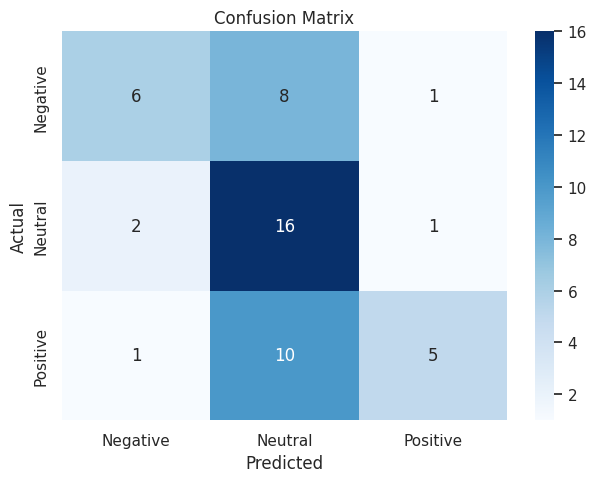

In [ ]:
# prompt: make heat map confussion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(df_test['label_encode'], y_pred_test)

# Define labels for axes
labels = ['Negative', 'Neutral', 'Positive']

# Create heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Save Predict


In [ ]:
df_test['predict'] = y_pred_test
df_test

full_text  \
0                                                                                                                                                                                                                                              spklu voltron perluas jaringan lewat kerja sama dengan living world   
1                                                                                                                                                                                                                                           kompresor ac mobil listrik bekerja mengambil daya listrik dari baterai   
2                                                                                                                                    pt pln persero melalui anak usahanya yakni pln haleyora power menggandeng tiga pihak itu untuk membangun 111 stasiun pengisian kendaraan listrik umum spklu baru di indonesia   
3                                                                                                                                                                                                                                                dua mobil listrik ini dapat potongan harga rp15 juta di pevs 2024   
4                                                                                                                                                                                                                                                                                         elon musk lah siapa kamu   
5                                                                                                                                                                                                                                                                               tua mendahului seperti-nya tertawa   
6                                                                                                                                                                                                                                                      tahun lalu beli sebegini ngab masih dapat cashback juga itu   
7                                                                                                                                                                            melihat hyundai ioniq 5 dan dari jauh sekilas sangat mirip ioniq 5 biasa tapi jangan salah perbedaan antara keduanya cukup signifikan   
8                                                                                                                                                                                                                                                           hahaha buat survei kok tidak lihat indikator yang lain   
9                                                                                                                                                                                                                   ada sejumlah spklu yang bisa dimanfaatkan pemudik yang menggunakan mobil listrik ini daftarnya   
10                                                                                                                                                                                                                                                                                   tamiya termasuk mobil listrik   
11                                                                                                                                                                                                                      baterai dari pohon percepat waktu isi daya ulang mobil listrik menjadi 8 menit dw industry   
12                                                                                                                                                 jangan bahas jalur pedestrian scbd iya tapi bahas jalur pedestrian secara umum saya sebagai pengguna transportasi publik

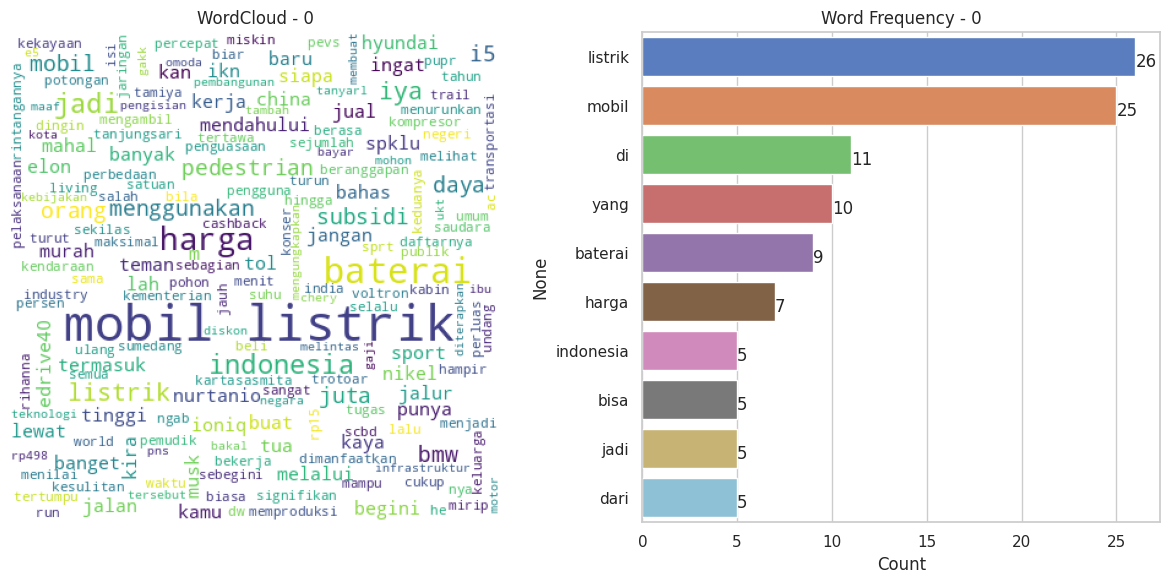

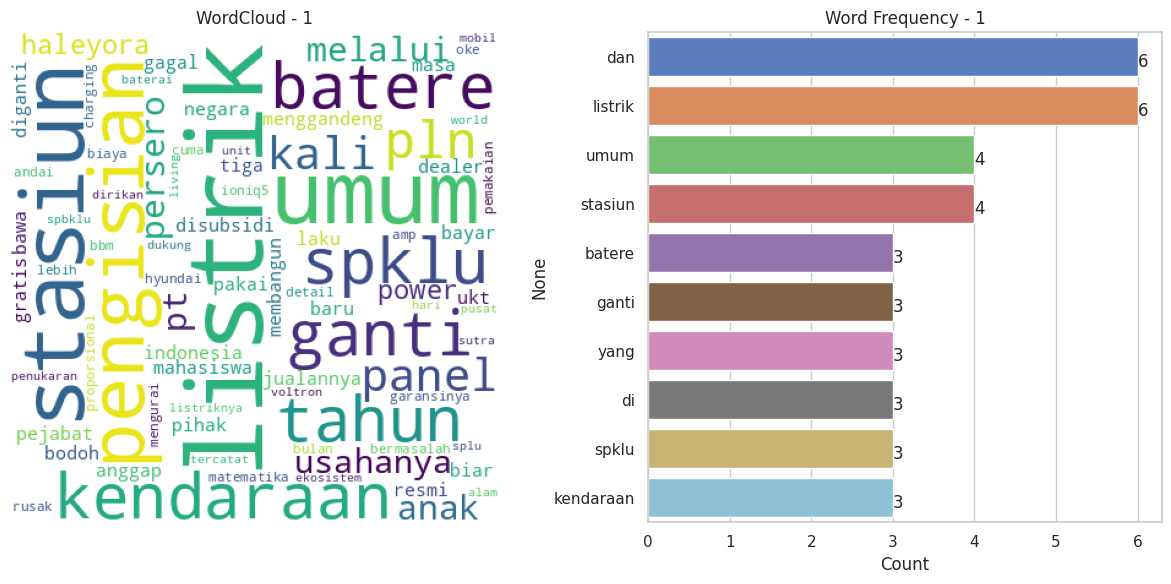

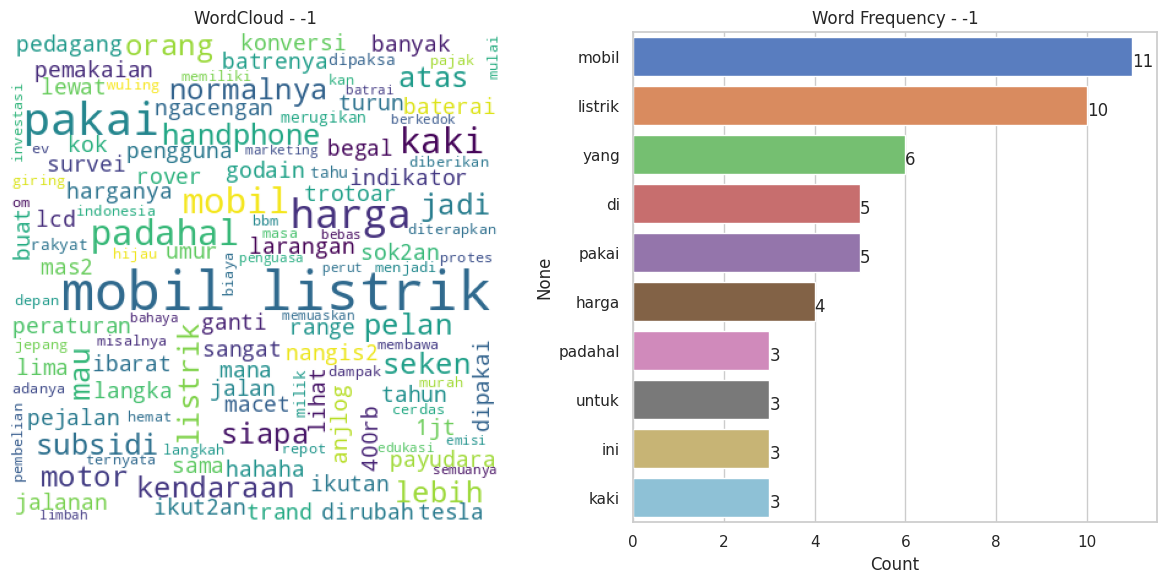

In [ ]:
plot_wordcloud_and_frequency(df_test, 'full_text', 'predict', sw_id, 10)

# KESIMPULAN

Berdasarkan analisis yang dilakukan, didapatkan bahwa,
- Pendapat masyarakat tentang mobil listrik sangat beragam. Akan tetapi masyarakat cenderung masih netral menaggapi isu ini.
- Masyarakat yang beranggapan negatif memiliki alasan bahwa mobil listrik membuat masalah macet semakin parah. Serta sarana pra-sarana yang ada belum sesuai.
- Masyarakat yang beranggapan positif memiliki alasan bahwa mobil listrik lebih ramah lingkungan dan murah.
- Masyarakat yang masih netral beranggapan bahwa hal ini suatu hal yang tidak buruk akan tetapi perlu adanya kebijakan dan penyesuaian sarana pra-sarana yang lebih ditingkatkan.

# Special EDA Result

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
# Load mask image
mask_image = np.array(Image.open("/content/drive/MyDrive/photo1718330208.jpeg"))

In [ ]:
# Membuat WordCloud
def plot_wordcloud(text, title, mask = None):
    wordcloud = WordCloud(width = 800, height = 800,
                          mask= mask,
                    background_color ='white',
                    stopwords = None,
                    repeat=True,
                    max_font_size=10000,
                    max_words=10000,
                    min_font_size = 1, contour_color='steelblue', contour_width=1).generate(text)
    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()



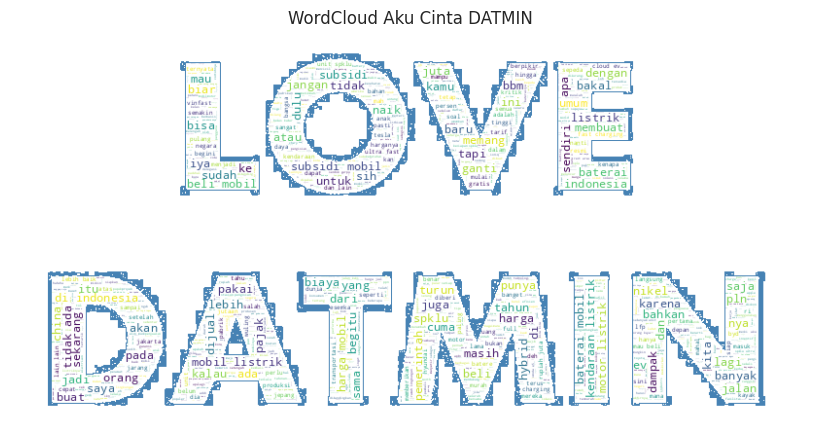

In [ ]:
plot_wordcloud(' '.join(df['full_text']), 'WordCloud Aku Cinta DATMIN', mask = mask_image)